In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# Set display options to show all columns
pd.set_option('display.max_columns', None)
from sklearn.calibration import LabelEncoder

pivot_df = pd.read_csv('../DataOut/pivot_df_1.csv')
# pivot_df = pd.read_csv('../DataOut/pivot_df.csv')
df = pd.read_csv('../DataOut/processed_data/bus_stop_times_feature_added_all.csv')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pivot_df.head()

,deviceid,TSCluster 0,TSCluster 1,TSCluster 2
0,116,37.278627,58.728413,3.992960
1,117,24.542519,75.457481,0.000000
2,123,18.067446,52.229584,29.702970
3,128,29.014363,54.001064,16.984573
4,262,50.250225,48.402412,1.347363


In [4]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,1,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,1,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,1,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,1,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,1,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91678,25370,121,1,110,2022-11-01,18:47:38,18:47:53,0:00:15,15.0,1,18.75,0,0,1,42,18.0,15.0,18.0,18.0,15.0,34.0,0.0,10.0,18,1,11,20.5,0.0,8.3,Overcast,134.0,mod,15.0
91679,25370,121,1,111,2022-11-01,18:50:08,18:50:15,0:00:07,7.0,1,18.75,0,0,1,42,9.0,9.0,9.0,9.0,7.0,15.0,34.0,0.0,18,1,11,20.5,0.0,8.3,Overcast,135.0,br,7.0
91680,25370,121,1,112,2022-11-01,18:52:39,18:52:50,0:00:11,11.0,1,18.75,0,0,1,42,6.0,6.0,6.0,6.0,0.0,7.0,15.0,34.0,18,1,11,20.5,0.0,8.3,Overcast,144.0,br,11.0
91681,25370,121,1,113,2022-11-01,18:55:01,18:55:14,0:00:13,13.0,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,11.0,7.0,15.0,18,1,11,20.5,0.0,8.3,Overcast,131.0,mod,13.0


In [5]:
selected_deviceid = pivot_df['deviceid'].unique()
selected_deviceid

array([ 116,  117,  123,  128,  262,  264,  274,  279,  294,  505,  513,
       1143, 1358, 1377])

In [6]:
df = df[df['deviceid'].isin(selected_deviceid)]
df['deviceid'].unique()

array([ 262,  274,  123,  279,  264,  294,  128,  505,  116,  117, 1358,
       1143,  513, 1377])

In [7]:
df

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,1,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,1,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,1,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,1,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,1,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91664,25369,513,1,110,2022-11-01,18:37:38,18:37:53,0:00:15,15.0,1,18.50,0,0,1,42,18.0,18.0,18.0,0.0,18.0,15.0,15.0,15.0,18,1,11,20.5,0.0,8.3,Overcast,169.0,mod,15.0
91665,25369,513,1,111,2022-11-01,18:40:24,18:40:38,0:00:14,14.0,1,18.50,0,0,1,42,7.0,7.0,7.0,0.0,7.0,15.0,15.0,15.0,18,1,11,20.5,0.0,8.3,Overcast,151.0,br,14.0
91666,25369,513,1,112,2022-11-01,18:43:16,18:43:19,0:00:03,3.0,1,18.50,0,0,1,42,7.0,7.0,7.0,0.0,7.0,14.0,15.0,15.0,18,1,11,20.5,0.0,8.3,Overcast,158.0,br,3.0
91667,25369,513,1,113,2022-11-01,18:45:30,18:45:43,0:00:13,13.0,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,3.0,14.0,15.0,18,1,11,20.5,0.0,8.3,Overcast,131.0,mod,13.0


In [8]:
unique_values_count = df['deviceid'].nunique()
print("Number of unique values:", unique_values_count)

Number of unique values: 14


In [9]:
#get all the column name
df.columns

Index(['trip_id', 'deviceid', 'direction', 'bus_stop', 'date', 'arrival_time',
       'departure_time', 'dwell_time', 'dwell_time_in_seconds_old',
       'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday',
       'weekday/end', 'week_no', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'dt(t-1)',
       'dt(t-2)', 'dt(n-1)', 'dt(n-2)', 'dt(n-3)', 'hour_of_day', 'day',
       'month', 'temp', 'precip', 'windspeed', 'conditions', 'rt(n-1)',
       'stop_type', 'dwell_time_in_seconds'],
      dtype='object')

In [10]:
# drop a list of columns
dropList=['departure_time','dwell_time','dwell_time_in_seconds_old','hour_of_day']
df=df.drop(dropList,axis=1)

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')


In [12]:
df = df.sort_values(by=['date', 'arrival_time'], ascending=True)

df.reset_index(drop=True, inplace=True)


In [13]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df.drop('date', axis=1, inplace=True)

In [14]:

df['arrival_hour'] = df['arrival_time'].dt.hour
df['arrival_min'] = df['arrival_time'].dt.minute
df['arrival_sec'] = df['arrival_time'].dt.second



In [15]:
df["arrival_time"]

0       1900-01-01 06:40:58
1       1900-01-01 06:45:42
2       1900-01-01 06:53:58
3       1900-01-01 06:57:19
4       1900-01-01 06:58:56
                ...        
69033   1900-01-01 18:37:38
69034   1900-01-01 18:40:24
69035   1900-01-01 18:43:16
69036   1900-01-01 18:45:30
69037   1900-01-01 18:47:06
Name: arrival_time, Length: 69038, dtype: datetime64[ns]

In [16]:
# Drop the original date column
df.drop('arrival_time', axis=1, inplace=True)

In [17]:
# Filter the DataFrame for month=10 and year=2021
df = df[(df['month'] == 10) & (df['year'] == 2021)]
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,1,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0,2021,6,40,58
1,1,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0,2021,6,45,42
2,1,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0,2021,6,53,58
3,1,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0,2021,6,57,19
4,1,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,1358,505,1,109,6,18.75,1,0,0,5,29.0,29.0,29.0,29.0,29.0,0.0,21.0,33.0,31,10,23.8,0.0,10.4,Overcast,38.0,pro,25.0,2021,18,51,57
5754,1358,505,1,110,6,18.75,1,0,0,5,18.0,18.0,18.0,18.0,36.0,25.0,0.0,21.0,31,10,23.8,0.0,10.4,Overcast,136.0,mod,23.0,2021,18,54,38
5755,1358,505,1,111,6,18.75,1,0,0,5,8.0,8.0,8.0,8.0,7.0,23.0,25.0,0.0,31,10,23.8,0.0,10.4,Overcast,127.0,br,0.0,2021,18,57,8
5756,1359,274,1,103,6,18.75,1,0,0,5,18.0,18.0,27.0,18.0,18.0,0.0,253.0,18.0,31,10,23.8,0.0,10.4,Overcast,426.0,mod,24.0,2021,18,58,18


In [18]:
# Columns to label encode
columns_to_encode = ['stop_type', 'conditions']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [19]:
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,1,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,1,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,1,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,1,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,1,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,1358,505,1,109,6,18.75,1,0,0,5,29.0,29.0,29.0,29.0,29.0,0.0,21.0,33.0,31,10,23.8,0.0,10.4,1,38.0,2,25.0,2021,18,51,57
5754,1358,505,1,110,6,18.75,1,0,0,5,18.0,18.0,18.0,18.0,36.0,25.0,0.0,21.0,31,10,23.8,0.0,10.4,1,136.0,1,23.0,2021,18,54,38
5755,1358,505,1,111,6,18.75,1,0,0,5,8.0,8.0,8.0,8.0,7.0,23.0,25.0,0.0,31,10,23.8,0.0,10.4,1,127.0,0,0.0,2021,18,57,8
5756,1359,274,1,103,6,18.75,1,0,0,5,18.0,18.0,27.0,18.0,18.0,0.0,253.0,18.0,31,10,23.8,0.0,10.4,1,426.0,1,24.0,2021,18,58,18


## Using XG boost without clusters

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target
features = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target = df['dwell_time_in_seconds']

# Filter data based on week_no condition
# test_data = df[df['week_no'].isin([39, 40, 41, 42])]
# train_data = df[~df['week_no'].isin([39, 40, 41, 42])]
test_data = df[df['week_no'].isin([5, 6])]
train_data = df[~df['week_no'].isin([5, 6])]

# Split train and test data into features and target
X_train = train_data.drop(columns=['dwell_time_in_seconds']) 
y_train = train_data['dwell_time_in_seconds']
X_test = test_data.drop(columns=['dwell_time_in_seconds'])
y_test = test_data['dwell_time_in_seconds']




In [21]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb1


model = xgb1.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


Mean Absolute Error: 28.58762235812334
Root Mean Square Error: 48.323066255010886


In [22]:
test_data

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
4015,976,505,1,101,0,6.50,0,0,1,5,58.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,25,10,19.7,0.0,4.7,2,94.0,2,71.0,2021,6,32,40
4016,976,505,1,102,0,6.50,0,0,1,5,34.0,34.0,34.0,34.0,34.0,71.0,34.0,34.0,25,10,19.7,0.0,4.7,2,230.0,1,40.0,2021,6,37,41
4017,978,274,1,101,0,6.50,0,0,1,5,58.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,25,10,19.7,0.0,4.7,2,80.0,2,124.0,2021,6,44,18
4018,976,505,1,103,0,6.50,0,0,1,5,23.0,30.0,30.0,30.0,30.0,40.0,71.0,30.0,25,10,19.7,0.0,4.7,2,387.0,1,30.0,2021,6,44,48
4019,976,505,1,104,0,6.75,0,0,1,5,0.0,1.0,1.0,1.0,1.0,30.0,40.0,71.0,25,10,19.7,0.0,4.7,2,184.0,0,0.0,2021,6,48,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,1358,505,1,109,6,18.75,1,0,0,5,29.0,29.0,29.0,29.0,29.0,0.0,21.0,33.0,31,10,23.8,0.0,10.4,1,38.0,2,25.0,2021,18,51,57
5754,1358,505,1,110,6,18.75,1,0,0,5,18.0,18.0,18.0,18.0,36.0,25.0,0.0,21.0,31,10,23.8,0.0,10.4,1,136.0,1,23.0,2021,18,54,38
5755,1358,505,1,111,6,18.75,1,0,0,5,8.0,8.0,8.0,8.0,7.0,23.0,25.0,0.0,31,10,23.8,0.0,10.4,1,127.0,0,0.0,2021,18,57,8
5756,1359,274,1,103,6,18.75,1,0,0,5,18.0,18.0,27.0,18.0,18.0,0.0,253.0,18.0,31,10,23.8,0.0,10.4,1,426.0,1,24.0,2021,18,58,18


In [23]:
#print each unique trip_id
test_data['trip_id'].unique()

array([ 976,  978,  980,  985,  986,  994,  995,  998,  999, 1003, 1004,
       1009, 1011, 1013, 1014, 1019, 1020, 1029, 1030, 1032, 1040, 1042,
       1043, 1047, 1049, 1058, 1059, 1060, 1062, 1064, 1071, 1073, 1074,
       1076, 1078, 1085, 1086, 1088, 1090, 1095, 1097, 1098, 1110, 1112,
       1115, 1116, 1127, 1129, 1131, 1133, 1134, 1144, 1150, 1152, 1155,
       1156, 1157, 1165, 1167, 1171, 1172, 1175, 1176, 1178, 1185, 1187,
       1189, 1194, 1195, 1197, 1200, 1202, 1208, 1210, 1213, 1214, 1217,
       1224, 1225, 1226, 1228, 1240, 1241, 1242, 1245, 1246, 1247, 1248,
       1257, 1259, 1260, 1262, 1264, 1265, 1266, 1275, 1277, 1278, 1279,
       1280, 1286, 1287, 1289, 1294, 1296, 1299, 1301, 1302, 1306, 1307,
       1309, 1311, 1313, 1315, 1317, 1319, 1325, 1329, 1335, 1339, 1340,
       1342, 1346, 1347, 1350, 1354, 1355, 1358, 1359])

In [24]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data = test_data.copy()
visualize_data['predicted_dwell_time'] = predictions




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data['combined_datetime'] = pd.to_datetime(
    visualize_data[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


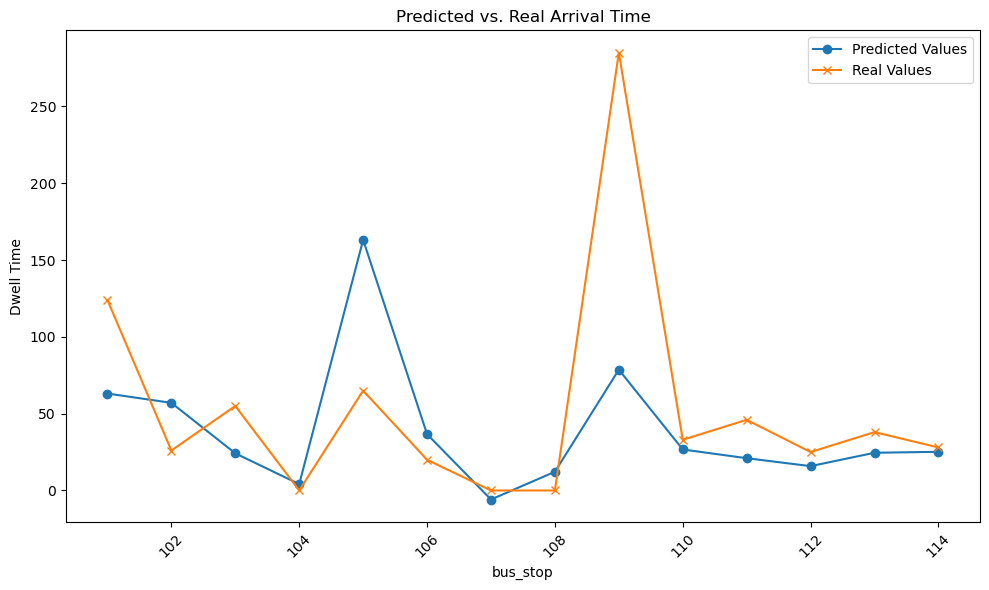

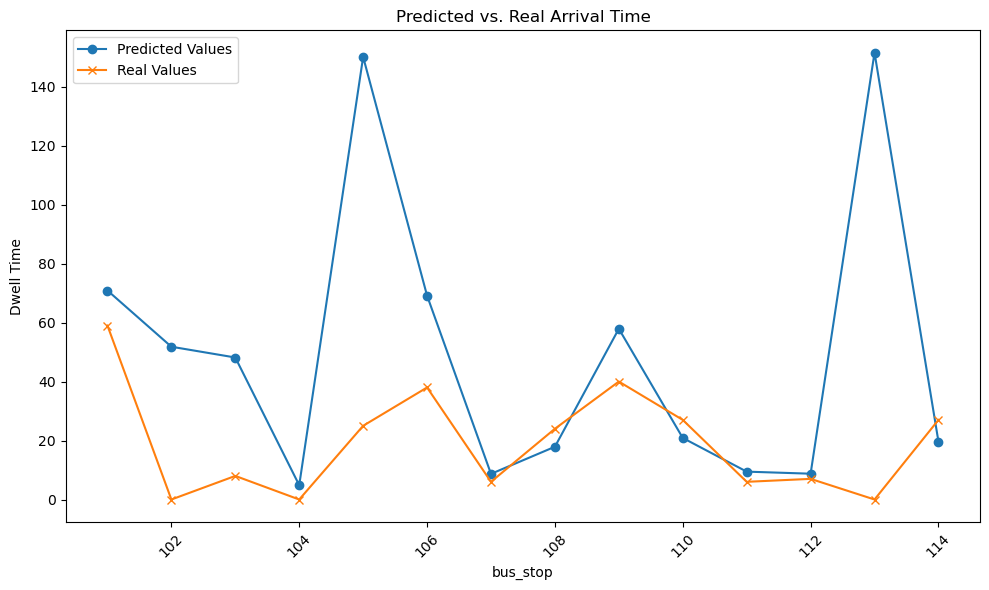

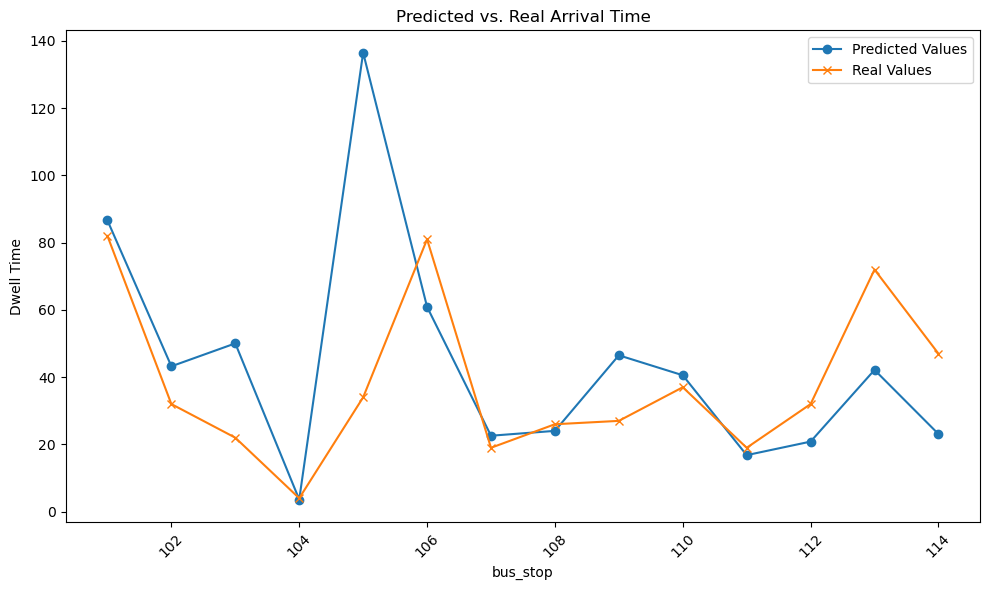

In [25]:

trip_id_list=[978,1355,1210]

for trips in trip_id_list:
    specific_busID_df = visualize_data[(visualize_data['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values.values, label='Predicted Values', marker='o')
    plt.plot(specific_busID_df['bus_stop'].values, real_values.values, label='Real Values', marker='x')
    plt.xlabel('bus_stop')
    plt.ylabel('Dwell Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Using XG boost with clusters

In [26]:
#add new feature

# Merge the dataframes using the device_id column
new_df = pd.merge(df, pivot_df, on='deviceid', how='inner')

In [27]:
new_df.head()

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,TSCluster 0,TSCluster 1,TSCluster 2
0,1,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58,50.250225,48.402412,1.347363
1,1,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42,50.250225,48.402412,1.347363
2,1,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58,50.250225,48.402412,1.347363
3,1,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19,50.250225,48.402412,1.347363
4,1,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56,50.250225,48.402412,1.347363


In [28]:
from sklearn.model_selection import train_test_split

# Define features and target
features1 = new_df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target1 = new_df['dwell_time_in_seconds']

# Filter data based on week_no condition
# test_data = new_df[new_df['week_no'].isin([39, 40, 41, 42])]
# train_data = new_df[~new_df['week_no'].isin([39, 40, 41, 42])]
test_data1 = new_df[new_df['week_no'].isin([5, 6])]
train_data1 = new_df[~new_df['week_no'].isin([5, 6])]

# Split train and test data into features and target
X_train1 = train_data1.drop(columns=['dwell_time_in_seconds']) 
y_train1 = train_data1['dwell_time_in_seconds']
X_test1 = test_data1.drop(columns=['dwell_time_in_seconds'])
y_test1 = test_data1['dwell_time_in_seconds']




In [29]:
# save as csv file 
new_df.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance.csv', index=False)

In [30]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


model1 = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model1.fit(X_train, y_train)

# Make predictions on the testing data
predictions1 = model1.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


Mean Absolute Error: 28.58762235812334
Root Mean Square Error: 48.323066255010886


In [31]:
test_data1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,TSCluster 0,TSCluster 1,TSCluster 2
681,1040,262,1,101,1,6.50,0,0,1,5,79.0,182.0,92.0,92.0,92.0,92.0,92.0,92.0,26,10,20.4,0.0,4.7,2,90.0,2,96.0,2021,6,33,3,50.250225,48.402412,1.347363
682,1040,262,1,102,1,6.50,0,0,1,5,0.0,34.0,34.0,34.0,34.0,96.0,34.0,34.0,26,10,20.4,0.0,4.7,2,187.0,1,0.0,2021,6,37,46,50.250225,48.402412,1.347363
683,1040,262,1,103,1,6.75,0,0,1,5,14.0,15.0,28.0,28.0,28.0,0.0,96.0,28.0,26,10,20.4,0.0,4.7,2,482.0,1,22.0,2021,6,45,48,50.250225,48.402412,1.347363
684,1040,262,1,104,1,6.75,0,0,1,5,1.0,0.0,1.0,1.0,1.0,22.0,0.0,96.0,26,10,20.4,0.0,4.7,2,220.0,0,0.0,2021,6,49,50,50.250225,48.402412,1.347363
685,1040,262,1,105,1,6.75,0,0,1,5,230.0,453.0,230.0,230.0,230.0,0.0,22.0,0.0,26,10,20.4,0.0,4.7,2,131.0,2,302.0,2021,6,52,1,50.250225,48.402412,1.347363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,1194,117,1,110,3,15.00,0,0,1,5,35.0,35.0,35.0,17.0,35.0,99.0,24.0,37.0,28,10,25.2,0.0,14.8,1,192.0,1,46.0,2021,15,1,51,24.542519,75.457481,0.000000
5754,1194,117,1,111,3,15.00,0,0,1,5,19.0,19.0,19.0,11.0,19.0,46.0,99.0,24.0,28,10,25.2,0.0,14.8,1,143.0,0,0.0,2021,15,5,0,24.542519,75.457481,0.000000
5755,1194,117,1,112,3,15.00,0,0,1,5,10.0,10.0,10.0,13.0,10.0,0.0,46.0,99.0,28,10,25.2,0.0,14.8,1,197.0,0,4.0,2021,15,8,17,24.542519,75.457481,0.000000
5756,1194,117,1,113,3,15.00,0,0,1,5,27.0,27.0,27.0,7.0,27.0,4.0,0.0,46.0,28,10,25.2,0.0,14.8,1,157.0,1,32.0,2021,15,10,58,24.542519,75.457481,0.000000


In [32]:
#print each unique trip_id
test_data1['trip_id'].unique()

array([1040, 1058, 1071, 1085, 1095, 1112, 1129, 1152, 1172, 1195, 1214,
       1224, 1245, 1262,  978,  998, 1013, 1030, 1098, 1116, 1134, 1226,
       1247, 1265, 1280, 1287, 1302, 1347, 1359,  994, 1009, 1131, 1189,
       1208, 1242, 1260, 1275, 1299, 1307, 1339, 1354,  980,  999, 1014,
       1032, 1110, 1127, 1144, 1165, 1185, 1210, 1240, 1257, 1277, 1294,
       1306, 1313, 1319, 1342,  985, 1003, 1019, 1047, 1062, 1076, 1090,
       1156, 1176, 1200, 1296, 1309, 1315, 1335,  986, 1004, 1020, 1049,
       1064, 1078, 1157, 1178, 1202, 1228, 1248, 1266, 1289, 1340, 1355,
        976,  995, 1011, 1029, 1042, 1059, 1073, 1086, 1155, 1175, 1197,
       1217, 1225, 1246, 1264, 1279, 1286, 1301, 1311, 1317, 1325, 1346,
       1358, 1043, 1060, 1074, 1088, 1097, 1115, 1133, 1167, 1187, 1213,
       1241, 1259, 1278, 1329, 1350, 1150, 1171, 1194])

In [33]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data1 = test_data1.copy()
visualize_data1['predicted_dwell_time'] = predictions1




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data1['combined_datetime'] = pd.to_datetime(
    visualize_data1[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


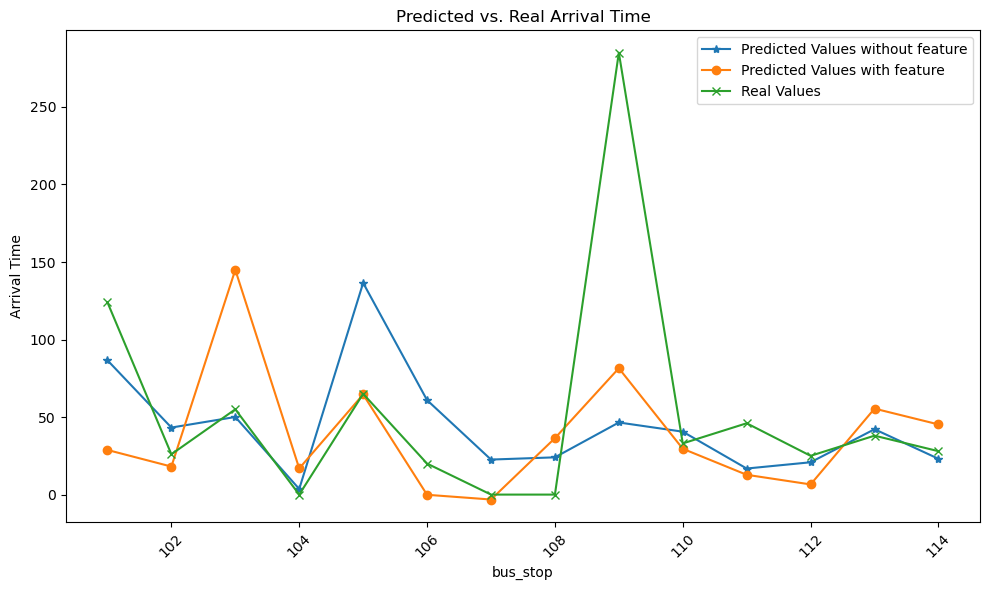

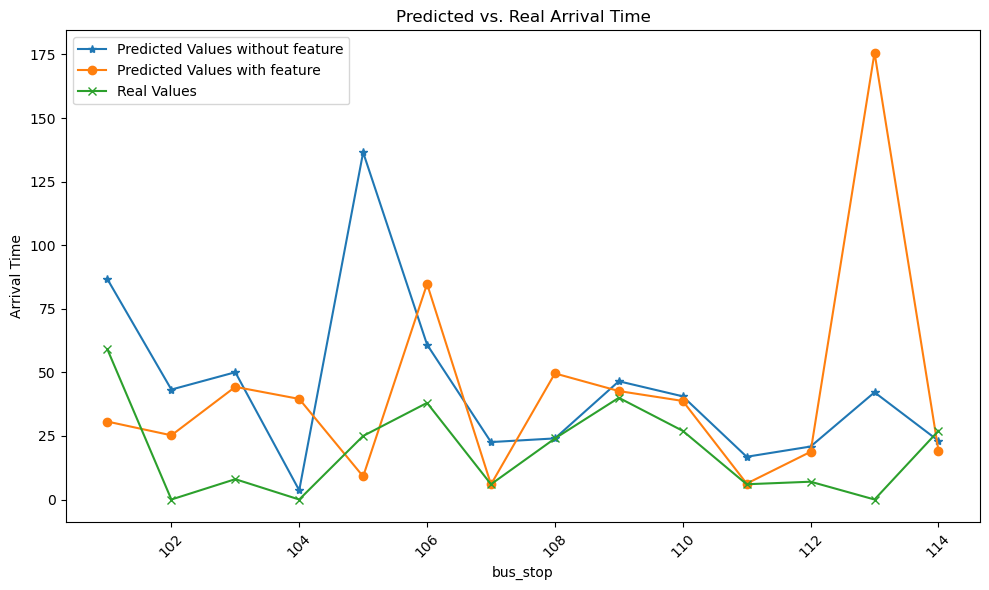

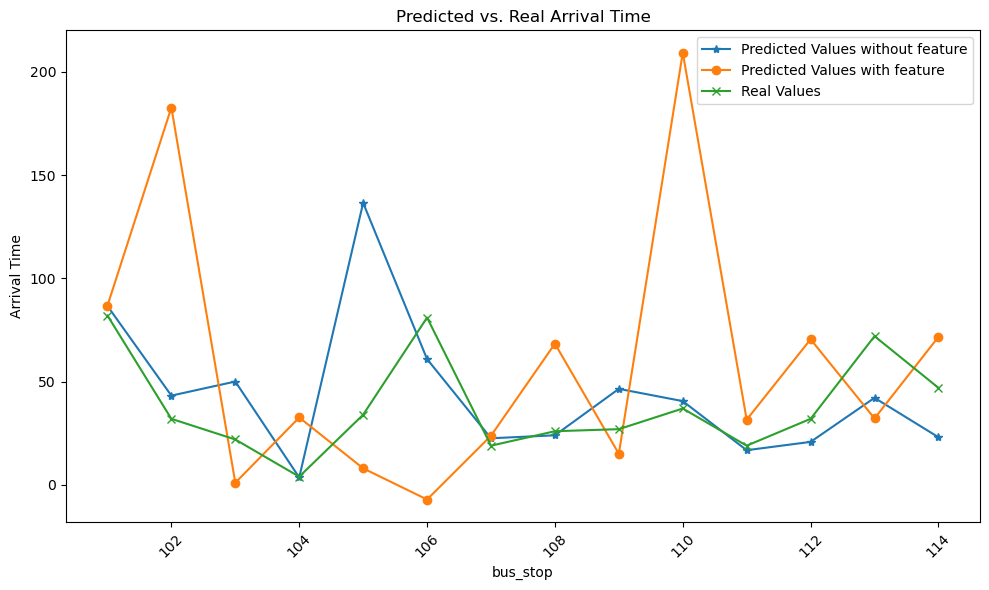

In [34]:
trip_id_list=[978,1355,1210]

for trips in trip_id_list:
    specific_busID_df = visualize_data1[(visualize_data1['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values1 = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values1 = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values.values, label='Predicted Values without feature', marker='*')
    plt.plot(specific_busID_df['bus_stop'].values, predicted_values1.values, label='Predicted Values with feature', marker='o')
    plt.plot(specific_busID_df['bus_stop'].values, real_values1.values, label='Real Values', marker='x')
    plt.xlabel('bus_stop')
    plt.ylabel('Arrival Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [36]:
predicted_values1 = pd.DataFrame(predicted_values1)
predicted_values1

,predicted_dwell_time
3182,86.753693
3183,182.665771
3184,1.048861
3185,32.644463
3186,8.039948
3187,-7.051282
3188,23.824869
3189,68.362656
3190,15.092758
3191,209.216736


In [43]:
visualize_data1

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec,TSCluster 0,TSCluster 1,TSCluster 2,predicted_dwell_time,combined_datetime
681,1040,262,1,101,1,6.50,0,0,1,5,79.0,182.0,92.0,92.0,92.0,92.0,92.0,92.0,26,10,20.4,0.0,4.7,2,90.0,2,96.0,2021,6,33,3,50.250225,48.402412,1.347363,60.177677,2021-10-26 06:33:03
682,1040,262,1,102,1,6.50,0,0,1,5,0.0,34.0,34.0,34.0,34.0,96.0,34.0,34.0,26,10,20.4,0.0,4.7,2,187.0,1,0.0,2021,6,37,46,50.250225,48.402412,1.347363,32.997021,2021-10-26 06:37:46
683,1040,262,1,103,1,6.75,0,0,1,5,14.0,15.0,28.0,28.0,28.0,0.0,96.0,28.0,26,10,20.4,0.0,4.7,2,482.0,1,22.0,2021,6,45,48,50.250225,48.402412,1.347363,63.105404,2021-10-26 06:45:48
684,1040,262,1,104,1,6.75,0,0,1,5,1.0,0.0,1.0,1.0,1.0,22.0,0.0,96.0,26,10,20.4,0.0,4.7,2,220.0,0,0.0,2021,6,49,50,50.250225,48.402412,1.347363,16.362827,2021-10-26 06:49:50
685,1040,262,1,105,1,6.75,0,0,1,5,230.0,453.0,230.0,230.0,230.0,0.0,22.0,0.0,26,10,20.4,0.0,4.7,2,131.0,2,302.0,2021,6,52,1,50.250225,48.402412,1.347363,-0.822991,2021-10-26 06:52:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5753,1194,117,1,110,3,15.00,0,0,1,5,35.0,35.0,35.0,17.0,35.0,99.0,24.0,37.0,28,10,25.2,0.0,14.8,1,192.0,1,46.0,2021,15,1,51,24.542519,75.457481,0.000000,30.784569,2021-10-28 15:01:51
5754,1194,117,1,111,3,15.00,0,0,1,5,19.0,19.0,19.0,11.0,19.0,46.0,99.0,24.0,28,10,25.2,0.0,14.8,1,143.0,0,0.0,2021,15,5,0,24.542519,75.457481,0.000000,12.263372,2021-10-28 15:05:00
5755,1194,117,1,112,3,15.00,0,0,1,5,10.0,10.0,10.0,13.0,10.0,0.0,46.0,99.0,28,10,25.2,0.0,14.8,1,197.0,0,4.0,2021,15,8,17,24.542519,75.457481,0.000000,-2.756095,2021-10-28 15:08:17
5756,1194,117,1,113,3,15.00,0,0,1,5,27.0,27.0,27.0,7.0,27.0,4.0,0.0,46.0,28,10,25.2,0.0,14.8,1,157.0,1,32.0,2021,15,10,58,24.542519,75.457481,0.000000,32.237785,2021-10-28 15:10:58


In [42]:
visualize_data1.to_csv('../DataOut/dwelltime_with_predictions.csv', index=False)